<a href="https://colab.research.google.com/github/pratikiiitb2013/EVA/blob/master/Session10/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1st Part - Showing grad-cam output for 2nd and 3rd last layers of VGG network on below dog image

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras import backend as K
from google.colab.patches import cv2_imshow
from skimage import io

Using TensorFlow backend.


In [0]:
model = VGG16(weights="imagenet")

dog = io.imread("https://www.rspcapetinsurance.org.au/rspca/media/images/hero/dog-insurance-hero.jpg")
dog = cv2.resize(dog, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(dog)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

W0716 10:03:50.394161 139939865732992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 10:03:50.413735 139939865732992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 10:03:50.417434 139939865732992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0716 10:03:50.447392 139939865732992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0716 10:03:52.216638 139939865732992 deprecation_wrapp

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
def get_superimposed_image_for_given_layer(img, class_output, model, layer_name):
  conv_layer = model.get_layer(layer_name)
  grads = K.gradients(class_output, conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(conv_layer.output_shape[-1]):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis = -1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0)
  return superimposed_img

  

In [0]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]


180


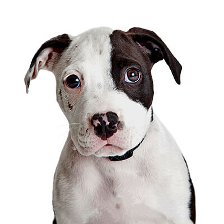

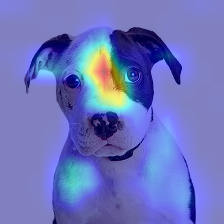

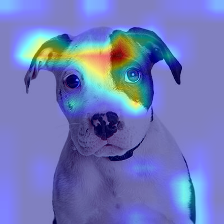

In [0]:
dog = cv2.cvtColor(dog, cv2.COLOR_RGB2BGR)
cv2_imshow(dog)
cv2_imshow(get_superimposed_image_for_given_layer(dog,class_output, model, "block5_conv2"))
cv2_imshow(get_superimposed_image_for_given_layer(dog,class_output, model, "block5_conv1"))



## 2nd Part - Showing grad-cam output for Tony Stark images for class 'sunglasses'


In [0]:
tony = io.imread("tony.jpg")
# dog = cv2.imread("tony.jpg")
tony = cv2.resize(tony, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(tony)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [0]:
class_idx = 837
print(class_idx)
class_output = model.output[:, class_idx]

837


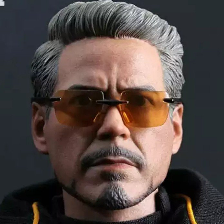

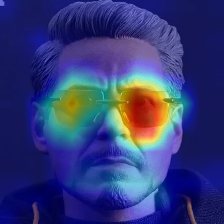

In [0]:
tony = cv2.cvtColor(tony, cv2.COLOR_RGB2BGR)
cv2_imshow(tony)
cv2_imshow(get_superimposed_image_for_given_layer(tony,class_output, model, "block5_conv3"))

## 3rd Part - Reason for increase in RF from 29 to 45

 #### In the pdf shared, while looking at the network, it is starting with 1 CONV layer, then 3 contracting blocks, then 3 expanding blocks. Now each contracting block is shown to have 2 CONV layers - one 2-strided CONV and then one simple CONV. So till the end of contracting blocks, there are in total 7 CONV layers. But in the table it is shown to have only 6 before contracting blocks end, there is no mention of 2nd CONV of 3rd contracting block. Now RF at the end of 6th CONV is 29, and its J_out is 8, so while calculating RF for this 7th CONV layer -> 29 + (3-1)X8 = 45. This is not mentioned in the table but RF goes from 29 to 45 for this 7th CONV layer.